In [6]:
import constants
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as patheffects

from helpers import rk4
from helpers import ODEs_nineboxes
from helpers import euler_method
from emissions import modified_emissions

In [118]:
# initial_masses = constants.Mi0
constants.MODIFIED_EMISSIONS = False
constants.FORCING = True
constants.FIRE = False

xinitial = 1800
xfinal =   2200

n=2650

In [119]:
rungekutta_nine = rk4(fxy=ODEs_nineboxes, x0=xinitial, xf=xfinal, y0=constants.Mi0_nineboxes, N=n)

STEP SIZE: 0.1509433962264151
RK4 Time Elapsed: 1.562 seconds


In [120]:
euler_nine = euler_method(fxy=ODEs_nineboxes, x0=xinitial, xf=xfinal, y0=constants.Mi0_nineboxes, N=n)

Euler Time Elapsed: 0.474 seconds


/Users/ejb/anaconda3/lib/python3.10/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/ejb/anaconda3/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


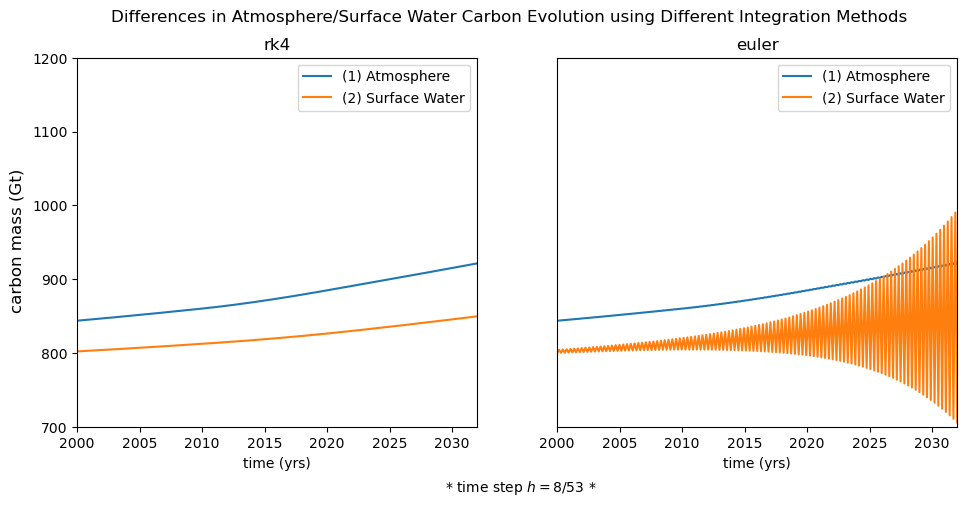

In [157]:
fig, axes = plt.subplots(1,2)

bigp0 = axes[0].plot(rungekutta_nine[0],rungekutta_nine[1])
bigp1 = axes[1].plot(euler_nine[0], euler_nine[1])

axes[0].set_ylim([0,2000])
axes[1].set_ylim([0,2000])

axes[0].set_title('rk4')
axes[1].set_title('euler')

axes[0].legend(['(1) Atmosphere','(2) Surface Water'])
axes[1].legend(['(1) Atmosphere','(2) Surface Water'])

fig.suptitle('Differences in Atmosphere/Surface Water Carbon Evolution using Different Integration Methods',x=0.8)

for i in range(2,9):
    bigp0[i].set_alpha(0.1)
    bigp1[i].set_alpha(0.1)

ylim = [700,1200]
xlim = [2000,2032]

axes[0].set_ylim(ylim)
axes[1].set_ylim(ylim)

axes[0].set_xlim(xlim)
axes[1].set_xlim(xlim)

axes[1].yaxis.set_visible(False)

axes[0].set_xlabel('time (yrs)')
axes[1].set_xlabel('time (yrs)')

fig.supylabel('carbon mass (Gt)')

plt.subplots_adjust(right=1.5)
plt.figtext(x=0.7,y=-0.025, s='* time step $h = 8/53$ *')

fig.savefig('RK4vsEULER',bbox_inches='tight')

In [ ]:
rungekutta_nine = rk4(fxy=ODEs_nineboxes, x0=xinitial, xf=xfinal, y0=constants.Mi0_nineboxes, N=n)

plt.plot(rungekutta_nine[0],rungekutta_nine[1])
plt.title(f'RK4 Over 9 Boxes with Emissions Forcing',pad=10)
plt.xlabel('time (yrs)'), plt.ylabel('mass (Gt)'), 
plt.legend(constants.ninebox_legend_arr, bbox_to_anchor=[0.5,-0.425], loc='lower center', ncol=3)
plt.figtext(x=0.5,y=-0.025, s='* box (4)\'s mass (\u2248 38 000 Gt) is too large to be plotted *',ha='center')
plt.ylim(0,2000)

plt.show()